# Homework 3
## Damian Franco
## CS-575

In [2]:
# Importing the required modules
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import time
from prettytable import PrettyTable
import scipy
import scipy.linalg 
%matplotlib inline

In [3]:
# Saves the current plot to desktop since working in Google Colab
from google.colab import files
#plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
#files.download("my_plot.png")

# GE without pivoting (GE) Banded Matrix

In [85]:
# Forward elimination
def forward(A, b):
  n = len(b)

  for k in range(n-1):
    # print('k:', k)
    for i in range(k+1, n):
      # print('i:', i)
      xmult = A[i][k] / A[k][k]
      # for j in range(k, n):
      for j in range(k, n):
        # print('j:', j)
        # print('k:', k, 'i:', i, 'j:', j)
        # print(A[k][j])
        A[i][j] = A[i][j] - xmult * A[k][j] 
      b[i] = b[i] - xmult * b[k]

  return A, b

In [104]:
def forward_tri(A, b):
    n = len(b)
    for k in range(n-1):
        xmult = A[k+1][k] / A[k][k]
        A[k+1][k+1] = A[k+1][k+1] - xmult * A[k][k+1]
        b[k+1] = b[k+1] - xmult * b[k]
    for k in range(n):
        for i in range(max(0, k-1), min(n, k+2)):
            if i != k+1:
                continue
            xmult = A[i][k] / A[k][k]
            for j in range(max(0, k-1), min(n, k+2)):
                if j != k and j != i:
                    continue
                A[i][j] = A[i][j] - xmult * A[k][j]
            b[i] = b[i] - xmult * b[k]
    return A, b

In [86]:
# Backward substitution
def back(U, b):
  n = len(b)
  x = np.zeros(n)
    
  x[n-1] = b[n-1] / U[n-1, n-1]
  for i in range(n-2, -1, -1):
    s = b[i]
    for j in range(i+1, n):
      s = s - U[i][j] * x[j]
    x[i] = s / U[i][i]

  return x

In [105]:
def GE(A,b):
  forA, forb = forward_tri(A, b)
  # print(forA)
  # print(forb)
  x = back(forA, forb)
  return x

In [106]:
def create_tri_mat(N):
  A_tri= np.zeros((N,3))
  A_tri[1:N,0] = -2*np.ones((N-1,)) #sub-diagonal
  A_tri[0:N,1] =  10*np.ones((N,))   #diagonal
  A_tri[0:N-1,2] = -4*np.ones((N-1,))   #super-diagonal
  return A_tri

In [107]:
def create_dense_mat(A_tri,N):
  A_dense = np.zeros((N,N))
  for i in range(N): # go over all rows
    # only 3 non-zero entries in each row.
    for j in range(i-1,i+2):  #This will go through entries (i,i-1), (i,i) and (i,i+1)
      if j >= 0 and j <= N-1:
        A_dense[i,j] = A_tri[i,j-i+1] #Make sure you understand the indexing
  return A_dense

In [108]:
N = 6
A_tri = create_tri_mat(N)
print(A_tri)

[[ 0. 10. -4.]
 [-2. 10. -4.]
 [-2. 10. -4.]
 [-2. 10. -4.]
 [-2. 10. -4.]
 [-2. 10.  0.]]


In [109]:
A_dense = create_dense_mat(A_tri, N)
print(A_dense)

[[10. -4.  0.  0.  0.  0.]
 [-2. 10. -4.  0.  0.  0.]
 [ 0. -2. 10. -4.  0.  0.]
 [ 0.  0. -2. 10. -4.  0.]
 [ 0.  0.  0. -2. 10. -4.]
 [ 0.  0.  0.  0. -2. 10.]]


In [110]:
b = np.ones(N)
print(b)

[1. 1. 1. 1. 1. 1.]


In [111]:
exact = np.linalg.solve(A_dense, b)
print(exact)

[0.19358884 0.23397211 0.23813585 0.22835357 0.20181599 0.1403632 ]


In [112]:
returnA, returnb = forward(A_dense, b)
print(returnA)

[[10.         -4.          0.          0.          0.          0.        ]
 [ 0.          9.2        -4.          0.          0.          0.        ]
 [ 0.          0.          9.13043478 -4.          0.          0.        ]
 [ 0.          0.          0.          9.12380952 -4.          0.        ]
 [ 0.          0.          0.          0.          9.12317328 -4.        ]
 [ 0.          0.          0.          0.          0.          9.12311213]]


In [113]:
print(returnb)

[1.         1.2        1.26086957 1.27619048 1.27974948 1.2805492 ]


In [114]:
returnAtri, returnbtri = forward_tri(A_dense, b)
print(returnAtri)

[[10.         -4.          0.          0.          0.          0.        ]
 [ 0.          9.2        -4.          0.          0.          0.        ]
 [ 0.          0.          9.13043478 -4.          0.          0.        ]
 [ 0.          0.          0.          9.12380952 -4.          0.        ]
 [ 0.          0.          0.          0.          9.12317328 -4.        ]
 [ 0.          0.          0.          0.          0.          9.12311213]]


In [115]:
print(returnbtri)

[1.         1.2        1.26086957 1.27619048 1.27974948 1.2805492 ]


In [116]:
approxxtri = back(returnAtri, returnbtri)
print(approxxtri)

[0.19358884 0.23397211 0.23813585 0.22835357 0.20181599 0.1403632 ]


In [117]:
aprroxGE = GE(A_dense, b)
print("My approximation:", aprroxGE)
print("Exact solution:", exact)

My approximation: [0.19358884 0.23397211 0.23813585 0.22835357 0.20181599 0.1403632 ]
Exact solution: [0.19358884 0.23397211 0.23813585 0.22835357 0.20181599 0.1403632 ]


In [118]:
num2_error = []
for i in range(len(b)):
  num2_error.append(abs(exact[i]-aprroxGE[i]))
print(num2_error)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [125]:
# This set of N values should generally work well for most machines for Mat-vec
# Changed this to fit more appropiatly with some tests on my machine
# N_arr = np.array([20, 40, 80, 160]) 
N_arr = [100,200,300,400,500,600,700,800,1000]
time_list = []
err_list = []
for curr_N in N_arr:
  # Generate random vectors and matrices
  A_curr_tri = create_tri_mat(curr_N)
  A_ge = create_dense_mat(A_curr_tri, curr_N)
  b_ge = np.ones(curr_N)
    
  if (np.linalg.det(A_ge) != 0):
    print("Non Singular matrix")
    t_start = time.time()
    x_mine = GE(A_ge, b_ge)
    t_end = time.time()
    
    #Verification
    x_true = np.linalg.solve(A_ge, b_ge)
    err_list.append(np.linalg.norm(x_mine - x_true))
    
    time_list.append(t_end-t_start)
  else:
    print("Singular Matrix")

Non Singular matrix
Non Singular matrix
Non Singular matrix
Non Singular matrix


/usr/local/lib/python3.8/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Non Singular matrix
Non Singular matrix
Non Singular matrix
Non Singular matrix
Non Singular matrix


In [126]:
print(x_true)
print(x_mine)

[0.24155385 0.35388463 0.39315772 0.40526553 0.4087649  0.40973812
 0.41000194 0.41007217 0.41009061 0.41009539 0.41009663 0.41009694
 0.41009702 0.41009704 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705
 0.41009705 0.41009705 0.41009705 0.41009705 0.41009705 0.4100

In [127]:
# Create error table with sizes
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["N size", "Runtime Speed (sec)", "Error"])

# Add rows
for i in range(len(N_arr)):
  myTable.add_row([N_arr[i], time_list[i], err_list[i]])

print(myTable)

+--------+----------------------+-------+
| N size | Runtime Speed (sec)  | Error |
+--------+----------------------+-------+
|  100   | 0.005667686462402344 |  0.0  |
|  200   | 0.021142244338989258 |  0.0  |
|  300   | 0.051323652267456055 |  0.0  |
|  400   | 0.10359001159667969  |  0.0  |
|  500   |   0.12713623046875   |  0.0  |
|  600   | 0.15452265739440918  |  0.0  |
|  700   | 0.20960474014282227  |  0.0  |
|  800   | 0.22070765495300293  |  0.0  |
|  1000  | 0.29892659187316895  |  0.0  |
+--------+----------------------+-------+


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

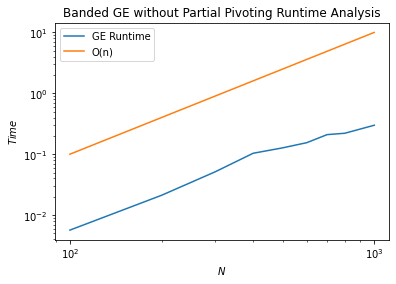

In [129]:
# Plot the runtime results
plt.loglog(N_arr, time_list, label='GE Runtime')
plt.xlabel('$N$')
plt.ylabel('$Time$')

# Plotting the x^2 asymptotic bound
x_cords = range(N_arr[0], N_arr[len(N_arr)-1])
y_cords = [x*x*1e-5 for x in x_cords]
plt.plot(x_cords, y_cords, label='O(n)')

plt.legend(loc="upper left")
plt.title('Banded GE without Partial Pivoting Runtime Analysis')

# plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
# files.download("my_plot.png")
plt.show() 